### Import libraries & dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load data (ONLY 2 FEATURES)

In [3]:
data = load_breast_cancer()

X = pd.DataFrame(
    data.data,
    columns=data.feature_names
)[["mean radius", "mean texture"]]

y = data.target

### Train–Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Feature Scaling 

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define Sigmoid Function

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Logistic Regression Class

In [15]:
class MyLogisticRegression:
    
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.epochs):
            
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
    def predict(self, X, threshold=0.5):
        y_probs = self.predict_proba(X)
        return np.where(y_probs >= threshold, 1, 0)
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)


### Train & Test Your Model

In [16]:
model = MyLogisticRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

###  Accuracy

In [17]:
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9035087719298246


###  Visualize Decision Boundary

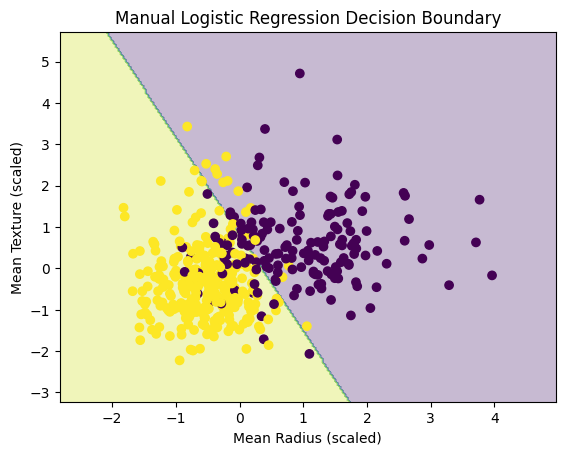

In [18]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel("Mean Radius (scaled)")
plt.ylabel("Mean Texture (scaled)")
plt.title("Manual Logistic Regression Decision Boundary")
plt.show()